In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from ppflows.uniform import ConditionalBox

from matplotlib import pyplot as plt
import numpy as np

In [2]:
d_context = 4
d_data = 3

n = 1000000

p_dropout = 0.1

In [3]:
conditional_box = ConditionalBox(d_data, d_context, 2, 4)

In [4]:
context = torch.rand(n, d_context)
sample, log_probs = conditional_box.sample_and_log_prob(1, context)
sample = sample.squeeze()
log_probs = log_probs.squeeze()

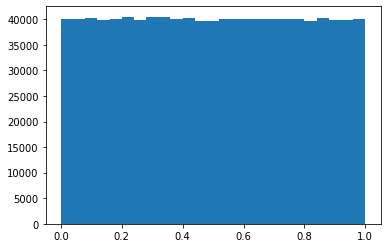

In [5]:
#plt.hist(sample.detach().numpy()[:,0], bins=25)
plt.hist(sample.detach().numpy()[:,0], weights=1/np.exp(log_probs.detach().numpy()) , bins=25)
plt.show()

In [6]:
# Test dropout probabilities
#sample = conditional_box.sample(1, context)
dropout_indices = torch.tensor(np.random.binomial(1, p_dropout, sample.shape))
sample[dropout_indices == 1] = 0.
log_probs_dropout = conditional_box._log_prob(sample, context)

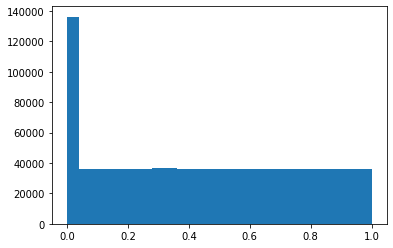

In [7]:
#plt.hist(sample.detach().numpy()[:,0], bins=25)
plt.hist(sample.detach().numpy()[:,0], weights=1/np.exp(log_probs_dropout.detach().numpy()) , bins=25)
plt.show()